In [8]:
image_exts = ['jpeg','jpg','bmp','png']

In [9]:
image_exts[2]

'bmp'

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data/Dogs/Unknown-10.jpeg
Issue with image data/Dogs/images-3.jpeg
Issue with image data/Dogs/Unknown-1.jpeg
Issue with image data/Dogs/Unknown-26.jpeg
Issue with image data/Dogs/images-10.jpeg
Issue with image data/Dogs/images-11.jpeg
Issue with image data/Dogs/images.jpeg
Issue with image data/Dogs/images-2.jpeg
Issue with image data/Dogs/Unknown-11.jpeg
Issue with image data/Dogs/images-5.jpeg
Issue with image data/Dogs/Unknown-7.jpeg
Issue with image data/Dogs/Unknown-20.jpeg
Issue with image data/Dogs/images-16.jpeg
Issue with image data/Dogs/Unknown-16.jpeg
Issue with image data/Dogs/images-9.jpeg
Issue with image data/Dogs/images-20.jpeg
Issue with image data/Dogs/images-21.jpeg
Issue with image data/Dogs/images-8.jpeg
Issue with image data/Dogs/Unknown-17.jpeg
Issue with image data/Dogs/images-17.jpeg
Issue with image data/Dogs/Unknown-21.jpeg
Issue with image data/Dogs/Unknown-6.jpeg
Issue with image data/Dogs/images-4.jpeg
Issue with image data/Dogs/images-14

In [23]:
!conda install matplotlib -y

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.11.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [24]:
import sys
sys.executable

'/opt/anaconda3/envs/ml/bin/python'

In [25]:
import sys
!{sys.executable} -m pip install matplotlib

In [26]:
from matplotlib import pyplot as plt

In [27]:
import numpy as np

In [28]:
import sys
!{sys.executable} -m pip install tensorflow

In [29]:
import tensorflow as tf

In [30]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 100 files belonging to 2 classes.


In [31]:
data_iterator = data.as_numpy_iterator()

In [32]:
batch = data_iterator.next()

In [33]:
batch[0].shape

(32, 256, 256, 3)

In [34]:
batch[1]

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int32)

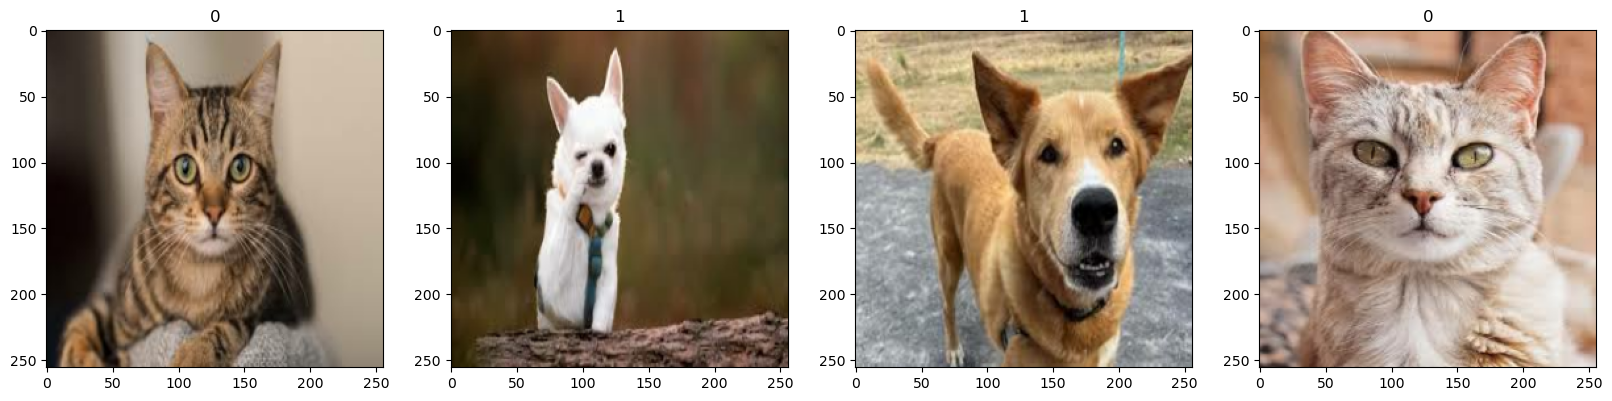

In [35]:
fog, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [36]:
scaled = batch[0] / 255

In [37]:
scaled.max()

np.float32(1.0)

In [38]:
scaled.min()

np.float32(0.0)

In [39]:
data = data.map(lambda x,y: (x/255, y))

In [40]:
data.as_numpy_iterator().next()[0].max()

np.float32(1.0)

In [41]:
len(data)

4

In [43]:
train_size = int(len(data)*.4)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [44]:
train_size+val_size+test_size

1

In [45]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [46]:
len(train)

1

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Flatten

In [57]:
model = Sequential()

In [58]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [62]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,755,825 (56.29 MB)

 Trainable params: 14,755,825 (56.29 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
logdir ='logs'

In [65]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [66]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5938 - loss: 0.6903
Epoch 2/20


2026-01-04 20:31:20.341079: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:164: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.5938 - loss: 0.7691
Epoch 3/20


2026-01-04 20:31:20.716297: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.6250 - loss: 5.8590
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.5000 - loss: 1.4905
Epoch 5/20


2026-01-04 20:31:21.317739: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.5312 - loss: 2.1651
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.4688 - loss: 2.0965
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.4062 - loss: 1.1184
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.7188 - loss: 0.6474
Epoch 9/20


2026-01-04 20:31:22.515726: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.5312 - loss: 0.8143
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.4688 - loss: 0.7313
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9062 - loss: 0.6054
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.6875 - loss: 0.6074
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.7188 - loss: 0.6079
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.5625 - loss: 0.5769
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.8438 - loss: 0.4728
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.9062 - loss: 0.4121
Epoch 17/20


2026-01-04 20:31:24.939096: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.7812 - loss: 0.5019
Epoch 18/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.8438 - loss: 0.3711
Epoch 19/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.8125 - loss: 0.4367
Epoch 20/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.8750 - loss: 0.3483


In [67]:
hist.history

{'accuracy': [0.59375,
  0.59375,
  0.625,
  0.5,
  0.53125,
  0.46875,
  0.40625,
  0.71875,
  0.53125,
  0.46875,
  0.90625,
  0.6875,
  0.71875,
  0.5625,
  0.84375,
  0.90625,
  0.78125,
  0.84375,
  0.8125,
  0.875],
 'loss': [0.6903287768363953,
  0.7690674066543579,
  5.859036922454834,
  1.490530014038086,
  2.1651296615600586,
  2.09653902053833,
  1.1183767318725586,
  0.6473725438117981,
  0.814264178276062,
  0.7313498854637146,
  0.6053786277770996,
  0.6074017286300659,
  0.6078575253486633,
  0.5769109725952148,
  0.4727707505226135,
  0.41211026906967163,
  0.5019417405128479,
  0.3711214065551758,
  0.43666642904281616,
  0.34825992584228516]}

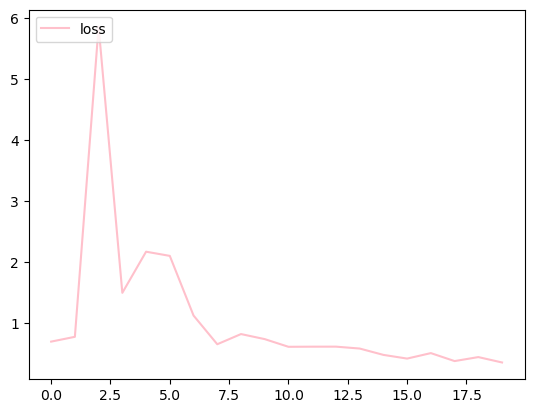

In [69]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='pink',label='loss')
plt.legend(loc="upper left")
plt.show()

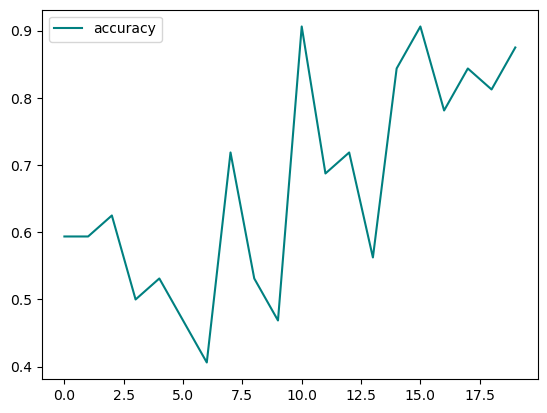

In [70]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.legend(loc="upper left")
plt.show()

In [71]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [72]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [73]:
for batch in test.as_numpy_iterator():
        X, y = batch
        yhat = model.predict(X)
        pre.update_state(y, yhat)
        re.update_state(y, yhat)
        acc.update_state(y, yhat)

In [74]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result()}, Accuracy:{acc.result().numpy}')

Precision:0.0, Recall:0.0, Accuracy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.0>>


In [75]:
import sys
!{sys.executable} -m pip install opencv-python

In [76]:
import cv2

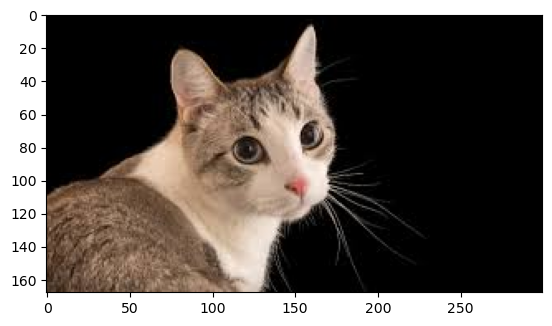

In [111]:
img = cv2.imread('data/cattest2.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

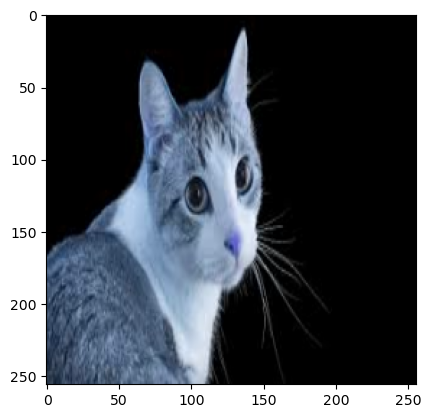

In [112]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))

plt.show()

In [113]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [114]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [115]:
yhat

array([[0.25052086]], dtype=float32)

In [116]:
if yhat > 0.5:
    print(f'Predicted class is a Dog')
else: 
    print(f'Predicted class is a Cat')

Predicted class is a Cat
